<h1><center>Introduction to data science</center></h1>

<h1><center>Lecture 15</center></h1>
<h1><center>Overfitting in classification </center></h1>




#  Important topics in classification

# <font color = red> 1- Overfitting in classification</font>

## Roughly speaking, over-fitting typically occurs when the ratio 


$\huge \huge \frac{Complexity \,of \,the\, model}{Training set size} $

## is too high. Think of over-fitting as a situation where your model learns the training data by heart instead of learning the big pictures which prevent it from being able to be generalized to the test data: this happens when the model is too complex with respect to the size of the training data

# Lets look at an example : fitting polynomials to data
-[SRC](https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738)

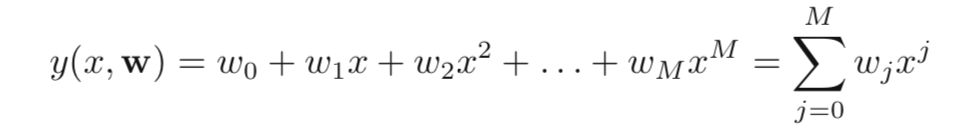

- The below plot of a training data set of N = 10 points, shown as blue circles, each comprising an observation of the input variable x along with the corresponding target variable t. The green curve shows the  function sin(2πx) used to generate the data. Our goal is to predict the value of t for some new value of x, without knowledge of the green curve.

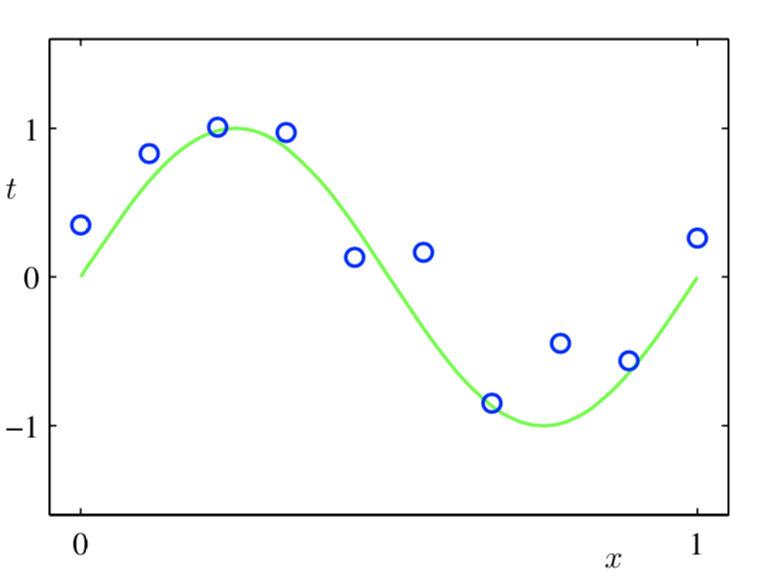

- Below figures: Plots of polynomials having various orders M, shown as red curves, fitted to the data set shown above

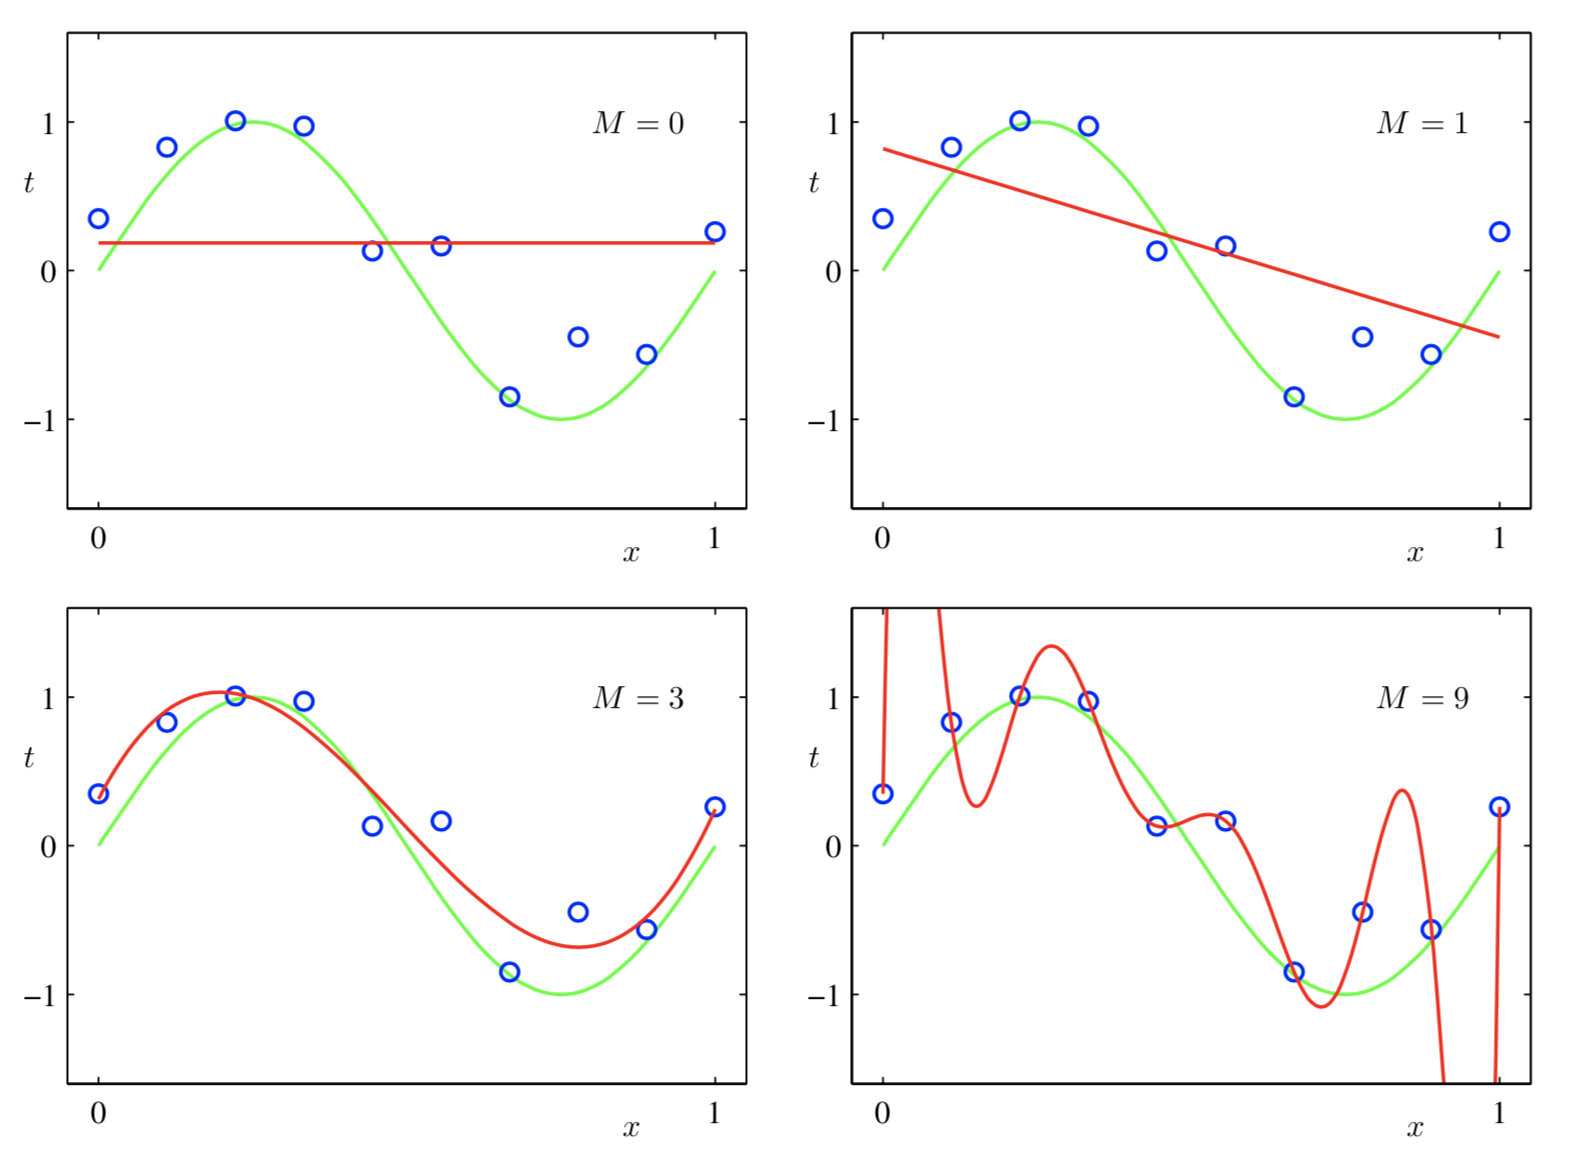

- plot below: Graphs of the root-mean-square error,evaluated on the training set 
    and on an inde- pendent test set for various values of M.

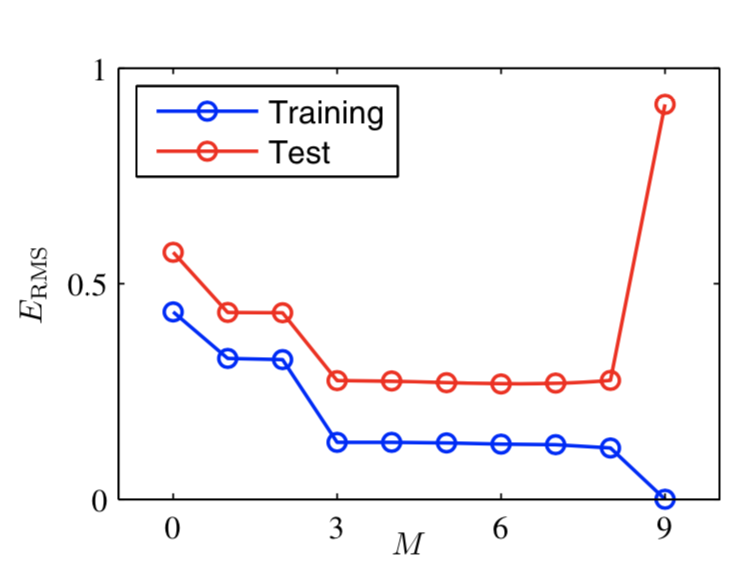

- Figures below: Plots of the solutions obtained by minimizing the sum-of-squares error function using the M = 9 polynomial for N = 15 data points (left plot) and N = 100 data points (right plot). We see that increasing the size of the data set reduces the over-fitting problem.

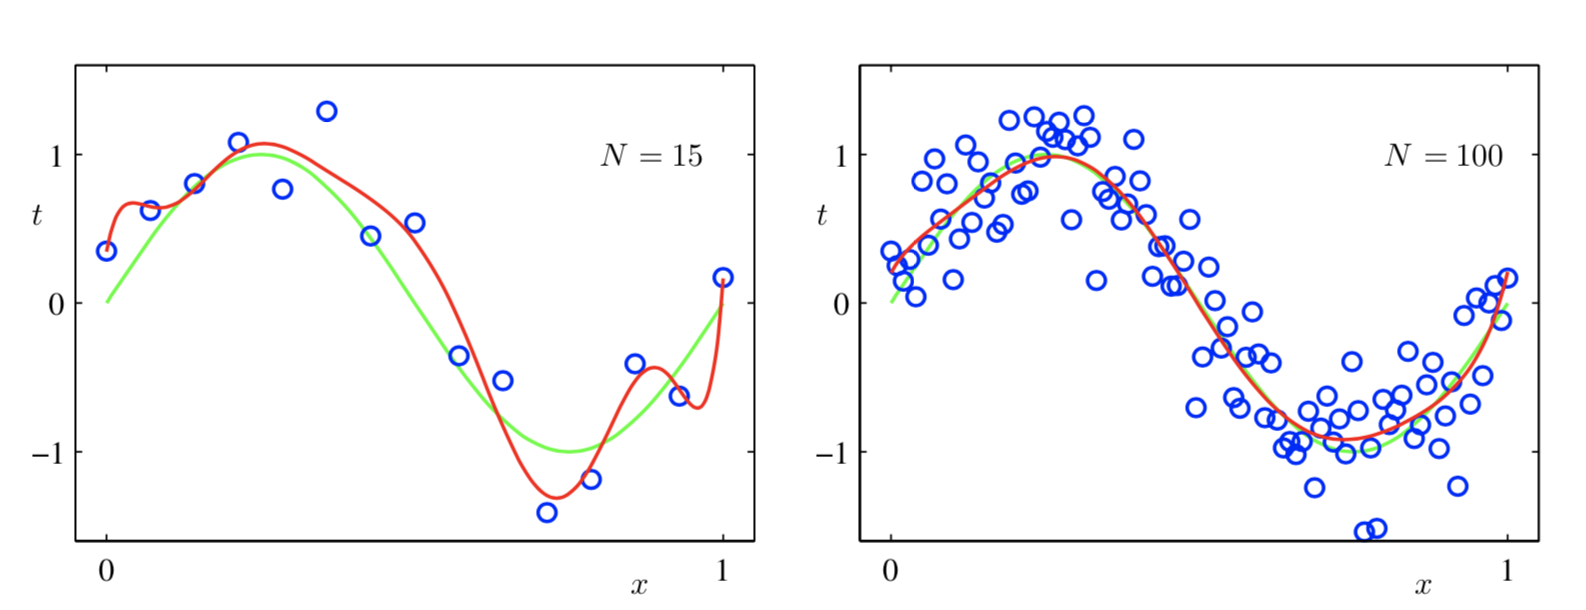

- Regularization :Graph of the root-mean-square error  versus lnλ for the M = 9 polynomial.

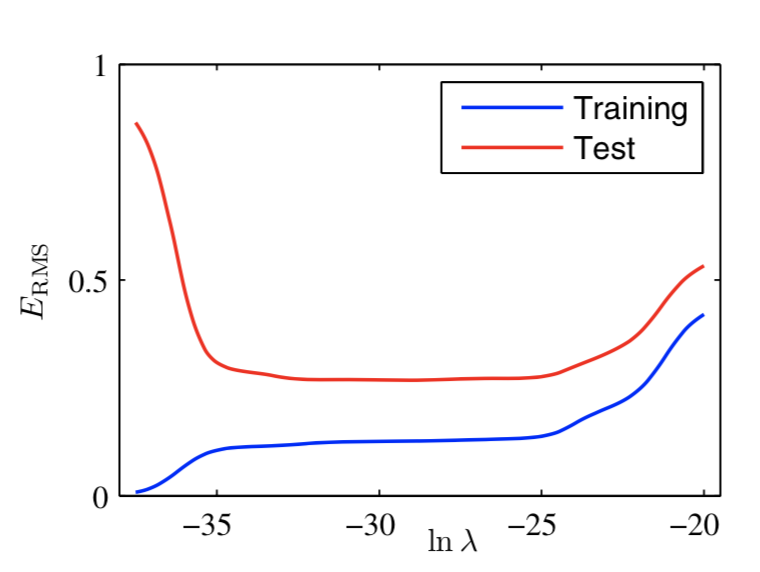

# An overfitting example using scikit-learn in Pythob

Automatically created module for IPython interactive environment


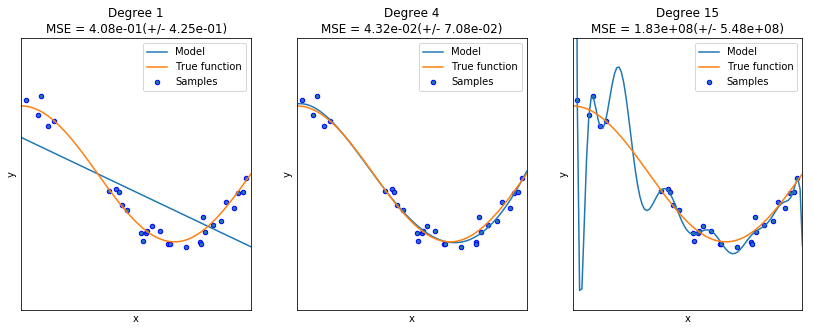

In [54]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Naive Bayes
-Commonly used in Machine Learning, Naive Bayes is a collection of classification algorithms based on Bayes Theorem.

## Pros and cons of Naive Bayes:

## Advantages
- It’s relatively simple to understand and build
- It’s easily trained, even with a small dataset
- It’s fast!
- It’s not sensitive to irrelevant features
## Disadvantages
- It assumes every feature is independent, which isn’t always the case


##  Naive Bayes classifires work based on Bayes Theorm
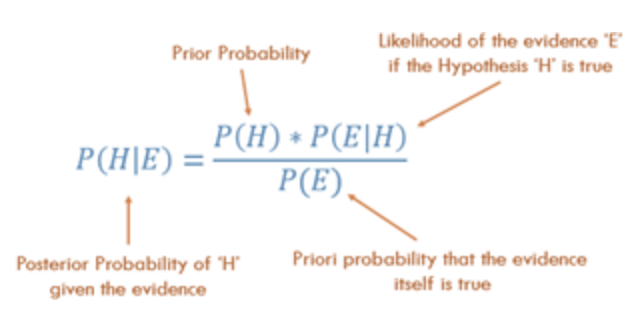

# Understanding  Naive Bayes using a simple example

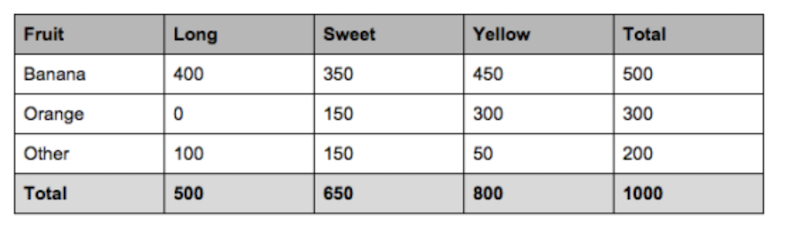



So from the table what do we already know?

- 50% of the fruits are bananas
- 30% are oranges
- 20% are other fruits

Based on our training set we can also say the following:

- From 500 bananas 400 (0.8) are Long, 350 (0.7) are Sweet and 450 (0.9) are Yellow
- Out of 300 oranges 0 are Long, 150 (0.5) are Sweet and 300 (1) are Yellow
- From the remaining 200 fruits, 100 (0.5) are Long, 150 (0.75) are Sweet and 50 (0.25) are Yellow

# Prediction:  we are given a fruit that is long, sweet and yellow,  predict what is the fruit?

# Probabilithy that the fruit is Banana?
$\huge  P(Banana|Long,Sweet,Yellow)=\huge \frac{ P(Long|Banana)\times P(Sweet|Banana)\times P(Yellow|Banana)\times P(Banana)}{P(Long)P(Sweet)cdotP(Yellow)} $

$\huge  P(Banana|Long,Sweet,Yellow) \propto \huge P(Long|Banana)\times P(Sweet|Banana)\times P(Yellow|Banana)\times P(Banana)$

$\huge  P(Banana|Long,Sweet,Yellow) \propto  \huge 0.8\times 0.7 \times 0.9 \times 0.5 = 0.25$



# Probability that the fruit is orange?

$ \huge P(Orange |Long,Sweet,Yellow) =0 $

# Probability that the fruit is others?

 $ \huge P(Others |Long,Sweet,Yellow) = 0.01875$


# The package we use is sklearn.naive_bayes

# Based on the assumption we make about the distrubution of the data, Navie Bayes classifies could be

 ## Gaussian Naive Bayes¶
 ##  Multinomial Naive Bayes¶
 ## Bernoulli Naive Bayes


# A simple example using Gaussian Naive Bayes:

In [7]:
import numpy as np

# input data
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
# labels or outputs
Y = np.array([1, 1, 1, 2, 2, 2])
# import navie bayes; we Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

# set the classifier based on default values
clf = GaussianNB()

# fit the classifies to data and their labels
clf.fit(X, Y)
# do you have any prior probability about each class; here no additional information is available
GaussianNB(priors=None)

# do prediction
print(clf.predict([[-0.8, -1]]))






[1]
